In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 16

In [2]:
from collections import OrderedDict

In [3]:
import numpy as np
import pandas as pd

In [4]:
from reflectorch import *

In [5]:
from periodictable import *
from periodictable import xsf

In [6]:
xsf.sld_table()

X-ray scattering length density for 1.5418 Ang
 El    rho   irho
  H   1.19   0.00
 He   1.03   0.00
 Li   3.92   0.00
 Be  13.93   0.01
  B  18.40   0.01
  C  18.71   0.03
  N   6.88   0.02
  O   9.74   0.04
  F  12.16   0.07
 Ne  10.26   0.09
 Na   7.98   0.09
 Mg  14.78   0.22
 Al  22.43   0.41
 Si  20.07   0.46
  P  15.26   0.44
  S  17.90   0.60
 Cl  12.97   0.52
 Ar  10.95   0.54
  K   7.26   0.41
 Ca  13.38   0.86
 Sc  24.10   1.81
 Ti  35.80   3.01
  V  46.97   4.47
 Cr  55.94   5.73
 Mn  55.37   6.42
 Fe  59.45   7.69
 Co  63.02   9.14
 Ni  64.40   1.35
 Cu  64.68   1.46
 Zn  52.64   1.30
 Ga  42.70   1.15
 Ge  38.43   1.15
 As  41.60   1.36
 Se  34.19   1.22
 Br  22.75   0.88
 Kr  15.51   0.63
 Rb  11.12   0.49
 Sr  18.52   0.91
  Y  33.03   1.80
 Zr  48.19   2.76
 Nb  64.03   3.93
 Mo  75.88   4.97
 Tc  85.67   5.96
 Ru  91.84   6.81
 Rh  92.34   7.46
 Pd  88.50   7.65
 Ag  77.93   7.06
 Cd  62.89   6.18
 In  53.09   5.36
 Sn  52.34   5.78
 Sb  47.54   5.29
 Te  43.10   5.62

In [7]:
sld = np.array((1.19,1.03,3.92,13.93,18.40,18.71,6.88,9.74,12.16,10.26,7.98,14.78,22.43,20.07,15.26,17.90,12.97,10.95,7.26,13.38,24.10,35.80,46.97,55.94,55.37,59.45,63.02,64.40,64.68,52.64,42.70,38.43,41.60,34.19,22.75,15.51,11.12,18.52,33.03,48.19,64.03,75.88,85.67,91.84,92.34,88.50,77.93,62.89,53.09,52.34,47.54,43.10,34.81,24.40,12.99,23.80,41.80,46.06,46.09,46.83,48.51,47.90,31.70,46.52,49.06,50.15,46.55,53.87,57.00,42.84,61.32,83.36,105.45,122.90,134.60,143.69,143.71,137.46,124.69,87.22,75.96,72.76,62.78,60.73,74.26,98.56,117.24))
sld_i = np.array((0.00,0.00,0.00,0.01,0.01,0.03,0.02,0.04,0.07,0.09,0.09,0.22,0.41,0.46,0.44,0.60,0.52,0.54,0.41,0.86,1.81,3.01,4.47,5.73,6.42,7.69,9.14,1.35,1.46,1.30,1.15,1.15,1.36,1.22,0.88,0.63,0.49,0.91,1.80,2.76,3.93,4.97,5.96,6.81,7.46,7.65,7.06,6.18,5.36,5.78,5.29,5.62,4.58,3.52,1.97,3.91,7.34,8.28,8.63,9.37,10.16,11.18,6.80,11.31,8.10,8.88,3.63,3.78,4.16,3.23,4.80,6.69,8.56,10.29,11.67,12.96,13.49,13.52,12.85,9.25,8.32,8.32,7.37,7.35,11.30,15.88,18.97))

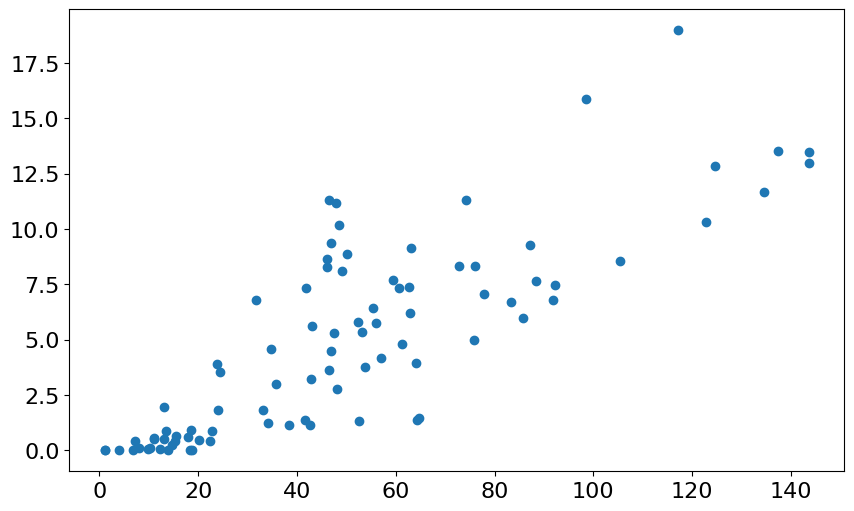

In [13]:
plt.plot(sld,sld_i, linestyle="", marker="o")

(array([24.,  9.,  2.,  5.,  5.,  5.,  5.,  8.,  6.,  6.,  2.,  3.,  1.,
         2.,  2.,  0.,  1.,  0.,  0.,  1.]),
 array([ 0.    ,  0.9485,  1.897 ,  2.8455,  3.794 ,  4.7425,  5.691 ,
         6.6395,  7.588 ,  8.5365,  9.485 , 10.4335, 11.382 , 12.3305,
        13.279 , 14.2275, 15.176 , 16.1245, 17.073 , 18.0215, 18.97  ]),
 <BarContainer object of 20 artists>)

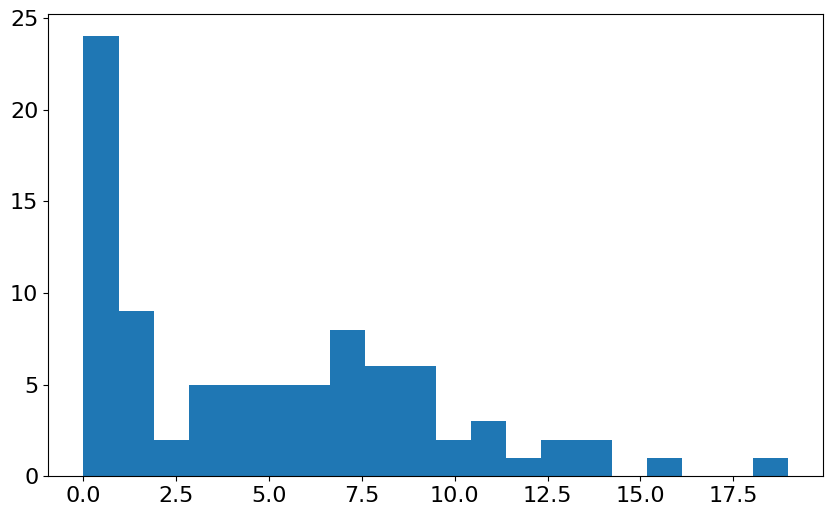

In [14]:
plt.hist(sld_i, bins=20)

In [20]:
trainer = get_trainer_by_name('l2q256_absorption_1', load_weights=False)

Model l2q256_absorption_1 loaded. Number of parameters: 2.85 M


## Train on simulated data

In [22]:
test_data = trainer.loader.get_batch(128)

In [21]:
training_data = trainer.loader.get_batch(1024)

In [23]:
training_data.keys()

dict_keys(['params', 'scaled_params', 'q_values', 'scaled_noisy_curves'])

##### Plot Params Distribution

In [24]:
slds = training_data['params'].slds
real_slds = []
imag_slds = []
for n in np.arange(slds.shape[0]):
    for m in np.arange(slds.shape[1]):
        r_slds = slds[n,m].cpu().numpy().real
        i_slds = slds[n,m].cpu().numpy().imag
        real_slds.append(r_slds)
        imag_slds.append(i_slds)

In [25]:
thicknesses = training_data['params'].thicknesses
thickness = []
for n in np.arange(thicknesses.shape[0]):
    for m in np.arange(thicknesses.shape[1]):
        t = thicknesses[n,m].cpu().numpy()
        thickness.append(t)

In [26]:
roughnesses = training_data['params'].roughnesses
roughness = []
for n in np.arange(roughnesses.shape[0]):
    for m in np.arange(roughnesses.shape[1]):
        r = roughnesses[n,m].cpu().numpy()
        roughness.append(r)

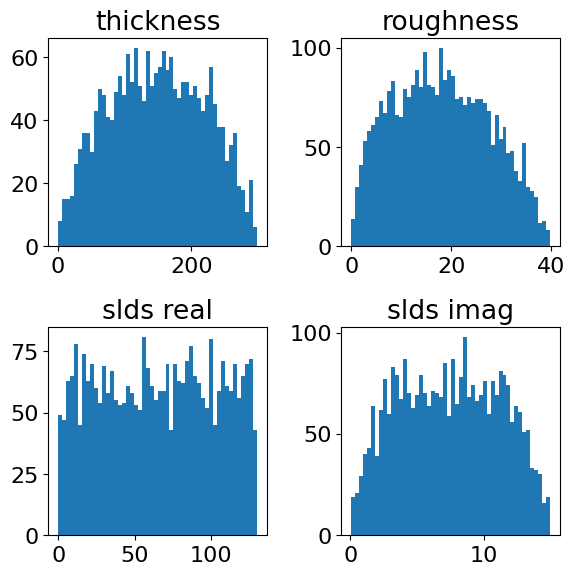

In [27]:
fig1, axs1 = plt.subplots(2,2, figsize=(6,6))
axs1[0,0].hist(thickness, bins=50)
axs1[0,0].set_title("thickness")
axs1[0,1].hist(roughness, bins=50)
axs1[0,1].set_title("roughness")
axs1[1,0].hist(real_slds, bins=50)
axs1[1,0].set_title("slds real")
axs1[1,1].hist(imag_slds, bins=50)
axs1[1,1].set_title("slds imag")
fig1.tight_layout(pad=1)


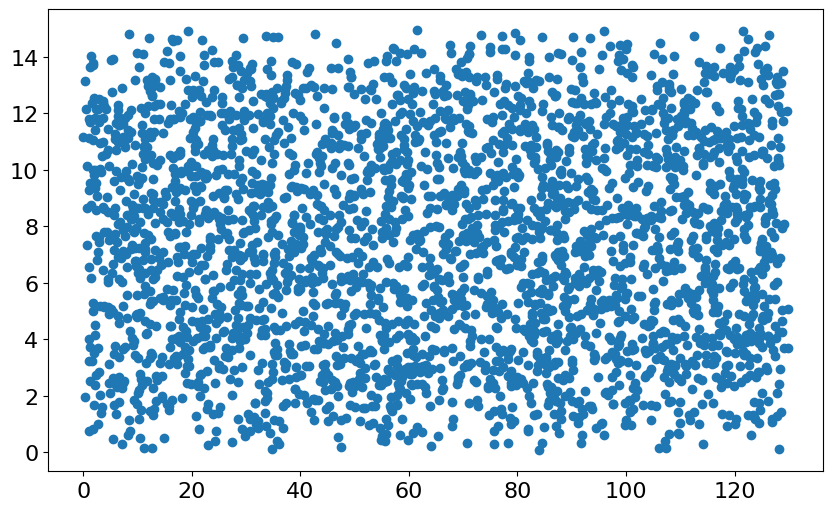

In [28]:
plt.plot(real_slds, imag_slds, linestyle="", marker="o")

In [13]:
from reflectorch.extensions.jupyter import JPlotLoss

In [14]:
trainer.set_lr(1e-4)

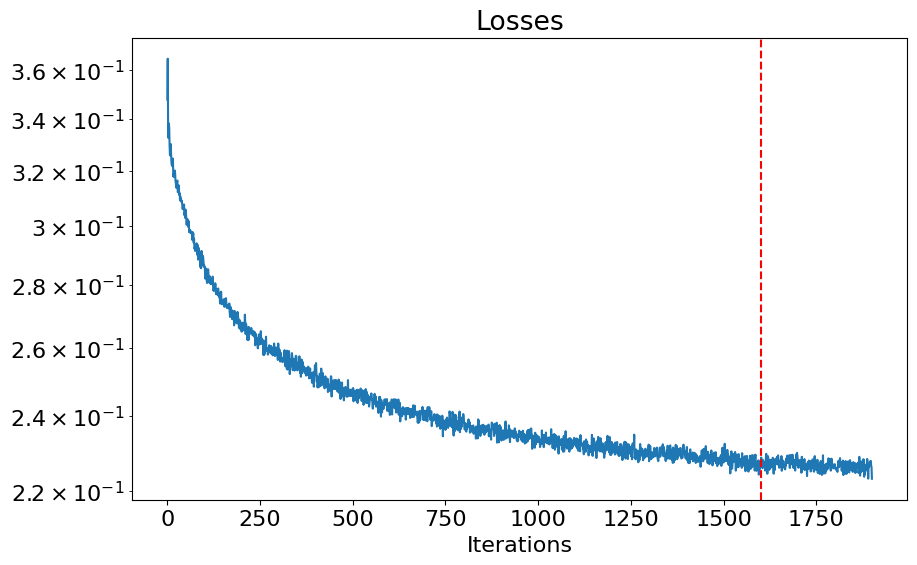

Loss = 2.26e-01: 100%|██████████| 2000/2000 [1:09:05<00:00,  2.07s/it]


In [15]:
trainer.train_epoch(2000, callbacks=(JPlotLoss(100, ), StepLR(100, 0.9, last_epoch=1800), SaveBestModel(str(SAVED_MODELS_DIR / 'l2q256_absorption_1.pt'), 100, )))

## Test on simulated Data

In [16]:
import torch

In [17]:
test_data = trainer.loader.get_batch(100)

In [18]:
scaled_target_params = trainer.loader.prior_sampler.scale_params(test_data['params'])

In [19]:
n = test_data['params'].num_params

In [20]:
scaled_params = scaled_target_params[..., :n]  # scaled target params
scaled_bounds = scaled_target_params[..., n:]  # scaled target bounds

In [21]:
noisy_curves = trainer.loader.curves_scaler.restore(test_data['scaled_noisy_curves'])
assert torch.allclose(test_data['scaled_noisy_curves'], trainer.loader.curves_scaler.scale(noisy_curves))

In [22]:
scaled_input = torch.cat([test_data['scaled_noisy_curves'], scaled_bounds], dim=-1)

In [23]:
test_data.keys()

dict_keys(['params', 'scaled_params', 'q_values', 'scaled_noisy_curves'])

In [24]:
scaled_input

tensor([[ 0.4996,  0.4875,  0.4979,  ...,  0.4468, -0.5102, -0.3293],
        [ 0.4820,  0.4971,  0.4986,  ...,  0.9675, -0.1324,  0.5990],
        [ 0.4308,  0.4132,  0.4205,  ...,  0.9227, -0.2831, -0.4418],
        ...,
        [ 0.4865,  0.4900,  0.4865,  ...,  0.9620, -0.1476, -0.5072],
        [ 0.4482,  0.4292,  0.4616,  ..., -0.3068,  0.1807,  0.2382],
        [ 0.5016,  0.4945,  0.5000,  ...,  0.3027,  0.5134, -0.1448]],
       device='cuda:0', dtype=torch.float64)

In [25]:
with torch.no_grad():
    trainer.model.eval()
    scaled_predictions = trainer.model(scaled_input.float())

In [26]:
scaled_predictions = torch.cat([scaled_predictions, scaled_bounds], dim=-1)

In [27]:
restored_predictions = trainer.loader.prior_sampler.restore_params(scaled_predictions)

In [28]:
torch.allclose(restored_predictions.min_bounds, test_data['params'].min_bounds)

True

In [29]:
real_curves = test_data['params'].reflectivity(trainer.loader.q_generator.q)

In [30]:
predicted_curves = restored_predictions.reflectivity(trainer.loader.q_generator.q)

In [56]:
q = np.linspace(0.02,0.15,256)

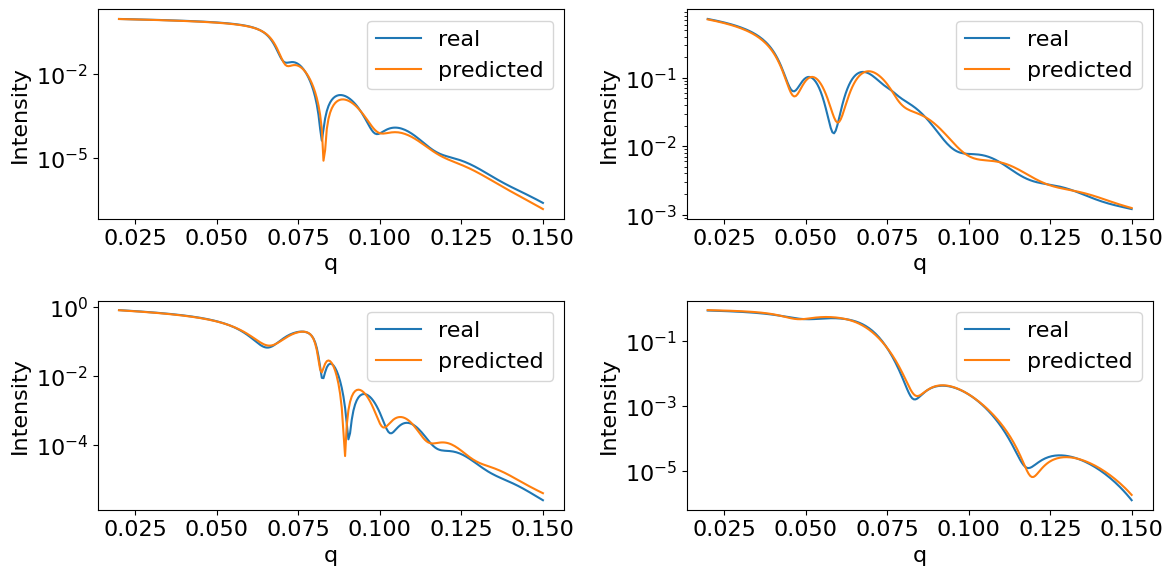

: 

In [61]:
fig2, axs2 = plt.subplots(2,2, figsize=(12,6))
axs2[0,0].semilogy(q, real_curves[3].cpu().numpy(), label="real")
axs2[0,0].semilogy(q, predicted_curves[3].cpu().numpy(), label="predicted")
axs2[0,0].legend()
axs2[0,1].semilogy(q, real_curves[12].cpu().numpy(), label="real")
axs2[0,1].semilogy(q, predicted_curves[12].cpu().numpy(), label="predicted")
axs2[0,1].legend()
axs2[1,0].semilogy(q, real_curves[25].cpu().numpy(), label="real")
axs2[1,0].semilogy(q, predicted_curves[25].cpu().numpy(), label="predicted")
axs2[1,0].legend()
axs2[1,1].semilogy(q, real_curves[38].cpu().numpy(), label="real")
axs2[1,1].semilogy(q, predicted_curves[38].cpu().numpy(), label="predicted")
axs2[1,1].legend()
axs2[0,0].set_xlabel("q")
axs2[0,0].set_ylabel("Intensity")
axs2[0,1].set_xlabel("q")
axs2[0,1].set_ylabel("Intensity")
axs2[1,0].set_xlabel("q")
axs2[1,0].set_ylabel("Intensity")
axs2[1,1].set_xlabel("q")
axs2[1,1].set_ylabel("Intensity")
fig2.tight_layout(pad=1)


In [32]:
# Absolute errors
real_thick = test_data['params'].thicknesses
predict_thick = restored_predictions.thicknesses
abserr_thick = []

for j in np.arange(real_thick.shape[0]):
    for i in np.arange(real_thick.shape[1]):
        real = real_thick[j,i].cpu().numpy()
        predict = predict_thick[j,i].cpu().numpy()
        #abserr = np.absolute(real - predict)
        abserr = real - predict
        abserr_thick.append(abserr)

In [33]:
real_rough = test_data['params'].roughnesses
predict_rough = restored_predictions.roughnesses
abserr_rough = []

for j in np.arange(real_rough.shape[0]):
    for i in np.arange(real_rough.shape[1]):
        real = real_rough[j,i].cpu().numpy()
        predict = predict_rough[j,i].cpu().numpy()
        #abserr = np.absolute(real - predict)
        abserr = real - predict
        abserr_rough.append(abserr)

In [34]:
real_sld = test_data['params'].slds
predict_slds = restored_predictions.slds
abserr_slds_r = []
abserr_slds_i = []

for j in np.arange(real_sld.shape[0]):
    for i in np.arange(real_sld.shape[1]):
        real_r = real_sld[j,i].cpu().numpy().real
        real_i = real_sld[j,i].cpu().numpy().imag
        predict_r = predict_slds[j,i].cpu().numpy().real
        predict_i = predict_slds[j,i].cpu().numpy().imag
        #abserr_r = np.absolute(real_r - predict_r)
        abserr_r = real_r - predict_r
        #abserr_i = np.absolute(real_i - predict_i)
        abserr_i = real_i - predict_i
        abserr_slds_r.append(abserr_r)
        abserr_slds_i.append(abserr_i)

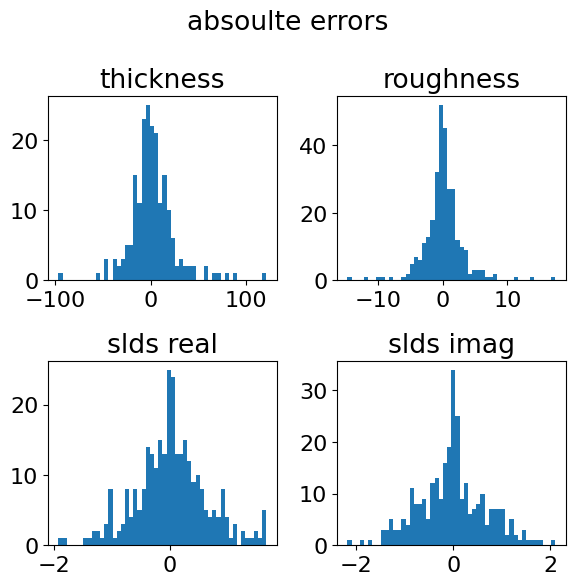

In [35]:
fig3, axs3 = plt.subplots(2,2, figsize=(6,6))
axs3[0,0].hist(abserr_thick, bins=50)
axs3[0,0].set_title("thickness")
axs3[0,1].hist(abserr_rough, bins=50)
axs3[0,1].set_title("roughness")
axs3[1,0].hist(abserr_slds_r, bins=50)
axs3[1,0].set_title("slds real")
axs3[1,1].hist(abserr_slds_i, bins=50)
axs3[1,1].set_title("slds imag")
fig3.suptitle("absoulte errors")
fig3.tight_layout(pad=1)


## Test on experimental Data

In [36]:
from reflectorch.inference.preprocess_exp import standard_preprocessing

In [37]:
class SpecParser:
    """Parse individual SPEC file scans on to Pandas DataFrames.

    Args:
    file_path: File path of the SPEC file.
    """

    def __init__(self, file_path: str):
        self.file_path = file_path
        with open(file_path) as file:
            self._file_lines = [line.rstrip() for line in file]

        self._scan_index = OrderedDict()
        self._index_scans()
        print(f'{self.number_of_scans} scans found in {file_path}')

    @property
    def scan_info(self):
        return self._scan_index

    @property
    def number_of_scans(self):
        return len(self._scan_index)

    def extract_scan(self, scan_number):
        """Extract scan of a given number into a table in the form of a Pandas :class:`DataFrame`."""
        column_names = self._extract_column_names(scan_number)
        data = self._extract_scan_data(scan_number)
        return pd.DataFrame(data=data, columns=column_names)

    def _extract_column_names(self, scan_number):
        header_idx = self._scan_index[int(scan_number)]['data_start_line']
        column_names = self._file_lines[header_idx].lstrip('#L ').split('  ')
        return column_names

    def _extract_scan_data(self, scan_number):
        data_idx = self._scan_index[int(scan_number)]['data_start_line'] + 1
        data = []
        while True:
            try:
                line = self._file_lines[data_idx]
            except IndexError:
                break
            else:
                if line.startswith('#') or not line:
                    break
            data.append(line.split())
            data_idx += 1
        return np.array(data, dtype=float)

    def _search_for_next_scan(self, start_index=0):
        index = start_index
        while True:
            try:
                line = self._file_lines[index]
            except IndexError:
                return None
            else:
                if line.startswith('#S'):
                    return index
            index += 1

    def _index_scans(self, start_index=0):
        start_index = self._search_for_next_scan(start_index)
        if start_index is None:
            return
        scan = {'scan_start_line': start_index}
        index = start_index
        while True:
            try:
                line = self._file_lines[index]
            except IndexError:
                scan['scan_end_line'] = index - 1
                break
            if line.startswith('#S'):
                line_parts = line.split()
                scan_number = line_parts[1]
                scan['spec_command'] = ' '.join(line_parts[2:])
            elif line.startswith('#D'):
                line_parts = line.split()
                scan['time'] = ' '.join(line_parts[1:])
            elif line.startswith('#L'):
                scan['data_start_line'] = index
            elif not line.strip():
                scan['scan_end_line'] = index - 1
                break
            index += 1
        self._scan_index[int(scan_number)] = scan
        self._index_scans(scan['scan_end_line'] + 1)

In [38]:
sp = SpecParser('2023-05-02-Ni_on_Si.spec')

61 scans found in 2023-05-02-Ni_on_Si.spec


In [39]:
scans = {}

for scan_num in (19, 26, 37, 46, 47, 54, 61):
    scans[scan_num] = sp.extract_scan(scan_num)

In [40]:
scan = scans[26]

In [41]:
skip_points = 25

double_theta = np.array(scan['Theta'] + scan['Two Theta'])[skip_points:]
r = np.array(scan['Specular'])[skip_points:]
ab = np.ones_like(r)

q_interp = np.linspace(0.02, 0.5, 256)

res = standard_preprocessing(
    r, double_theta, np.ones_like(r), wavelength=1., beam_width=0.5, sample_length=25, q_interp=q_interp
)

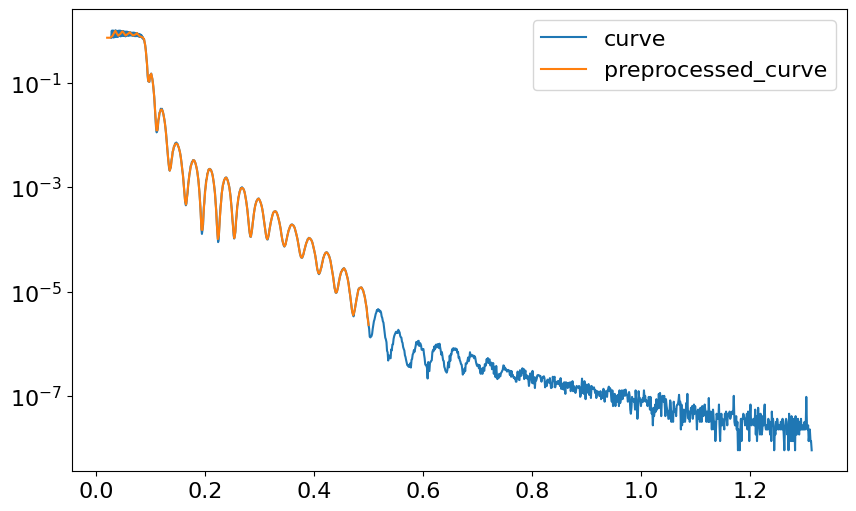

In [42]:
plt.semilogy(res['q_values'], res['curve'], label='curve')
plt.semilogy(res['q_interp'], res['curve_interp'], label='preprocessed_curve')
plt.legend()

In [45]:
import refnx

In [51]:
res['curve_interp'].shape

(256,)

In [47]:
with torch.no_grad():
    trainer.model.eval()
    exp_predictions = trainer.model(torch.tensor(res['curve_interp']))

RuntimeError: split_with_sizes expects split_sizes to sum exactly to 256 (input tensor's size at dimension -1), but got split_sizes=[256, 22]